### 비지도 학습
- 데이터만 존재하는 경우 학습 방법
- 타겟(라벨, 정답)이 없는 데이터
- 분류 기준
    * 유사도(데이터의 거리)
    * 분산(데이터 사이의 분포)
- 평가 기준
    * 유사도와 분산을 기본으로 계산 진행
    * 계산 방법 다양 => 평가지표 계수 존재
- 종류
    * 군집화 => 분할, 계층
    * 성분 분석 => 주성분 분석
    * 밀도 분류 => DBSCAN
- 용도
    * 지도학습의 전처리에 활용
    * 비지도학습으로 분류 후 지도학습으로 최종 평가 가능

#### 군집화 => 분할 방식의 K-means
- k개의 임의의 점을 중김으로 데이터와 거리 측정 후 군집 설정
- 설정된 군집의 평균값 계산 ==> 중심점 이동 ==> 다시 군집 설정
- 반복해서 진행
- 타원형으로만 군집이 가능

#### K-means 실습 (iris 데이터)

[1] 데이터 로딩 및 확인

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
iris_data = load_iris().data

In [4]:
column = load_iris().feature_names

In [5]:
irisDF = pd.DataFrame(iris_data, columns=column)

In [6]:
irisDF.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


[2] 데이터 분류 진행 ==> Kmeans

In [7]:
# kModel = KMeans(init='k-means++', n_clusters=2)

In [8]:
kModel = KMeans(n_init='auto')

In [9]:
kModel.fit(irisDF)

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_init='auto')

[3] 분류 후 결과 속성

In [10]:
kModel.cluster_centers_

array([[7.475     , 3.125     , 6.3       , 2.05      ],
       [5.24285714, 3.66785714, 1.5       , 0.28214286],
       [6.43      , 2.94      , 4.59      , 1.435     ],
       [6.56818182, 3.08636364, 5.53636364, 2.16363636],
       [6.02777778, 2.73333333, 5.02777778, 1.79444444],
       [5.        , 2.3       , 3.275     , 1.025     ],
       [5.62083333, 2.69166667, 4.075     , 1.2625    ],
       [4.70454545, 3.12272727, 1.41363636, 0.2       ]])

In [11]:
kModel.labels_

array([1, 7, 7, 7, 1, 1, 7, 1, 7, 7, 1, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1,
       7, 1, 7, 7, 1, 1, 1, 7, 7, 1, 1, 1, 7, 7, 1, 1, 7, 1, 1, 7, 7, 1,
       1, 7, 1, 7, 1, 7, 2, 2, 2, 6, 2, 6, 2, 5, 2, 6, 5, 6, 6, 2, 6, 2,
       6, 6, 2, 6, 4, 6, 4, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 4, 6, 2, 2, 2,
       6, 6, 6, 2, 6, 5, 6, 6, 6, 2, 5, 6, 3, 4, 0, 3, 3, 0, 6, 0, 3, 0,
       3, 4, 3, 4, 4, 3, 3, 0, 0, 4, 3, 4, 0, 4, 3, 0, 4, 4, 3, 0, 0, 0,
       3, 4, 4, 0, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 4])

In [12]:
# 반복 횟수
kModel.n_iter_

9

In [13]:
# n_cluster에 따라 변함
# 클러스터 중심과 클러스터에 속한 샘플 사이의 거리 제곱합
kModel.inertia_

30.064593073593073

[4] iris 데이터셋의 target이랑 kmeans의 labels 값 비교

In [14]:
irisDF['target'] = load_iris().target

In [15]:
irisDF['cluster'] = kModel.labels_

In [16]:
irisDF.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,7
2,4.7,3.2,1.3,0.2,0,7


In [17]:
irisDF.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [18]:
irisDF['cluster'].value_counts()

1    28
6    24
7    22
3    22
2    20
4    18
0    12
5     4
Name: cluster, dtype: int64

최적의 k 찾기

In [19]:
# 타겟 컬럼 제거
irisDF.drop(['target'], axis=1, inplace=True)

In [20]:
irisDF.drop(['cluster'], axis=1, inplace=True)

In [21]:
irisDF.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


- [방법 1] inertial_속성값으로 k 판단 ==> 값이 작을 수록 좋음, k 갯수에 따라 값의 변화가 큰 구간

In [22]:
arr_inertial = []
for n in range(1, 11):
    model = KMeans(n_clusters=n, random_state=10, init='k-means++')
    model.fit(irisDF)
    arr_inertial.append(model.inertia_)

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chun

In [23]:
import platform
import matplotlib
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')

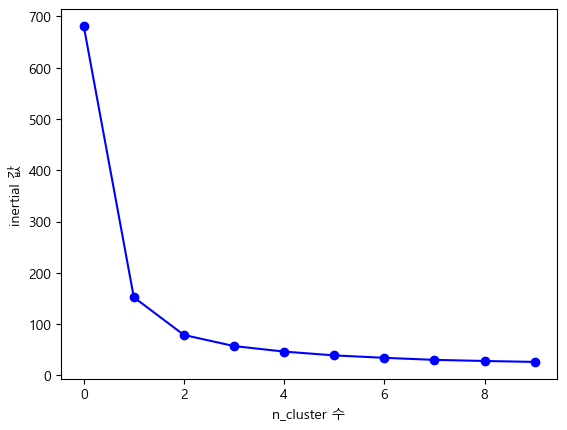

In [24]:
plt.plot(arr_inertial, 'bo-')
plt.xlabel('n_cluster 수')
plt.ylabel('inertial 값')
plt.show()

- [방법 2] Dunn Index => 군집간의 거리, 군집 내 거리의 비율로 측정 => Davies-Bouldun score

In [25]:
from sklearn.metrics import davies_bouldin_score

In [26]:
db_score = []
for n in range(2, 11):
    model = KMeans(n_clusters=n, random_state=10, init='k-means++')
    model.fit(irisDF)

    sc = davies_bouldin_score(irisDF, model.labels_)
    db_score.append(sc)

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chun

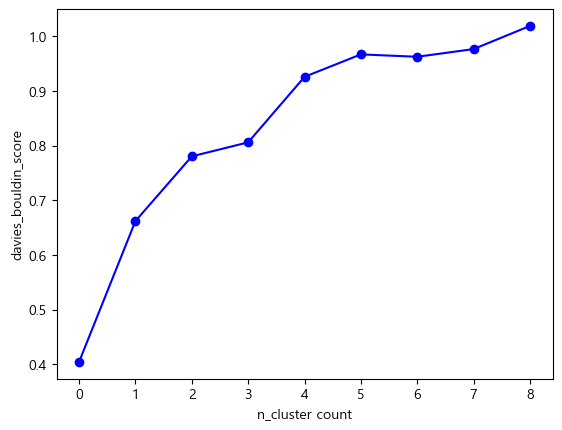

In [27]:
plt.plot(db_score, 'bo-')
plt.xlabel('n_cluster count')
plt.ylabel('davies_bouldin_score')
plt.show()